## Dictionary Learning

Given a dataset $X=[x_1,x_2,..,x_N]$ where $x_i \in \mathbb{R}^d$, we say that a dictionary is a set of vectors $D=[d_1,d_2,..,d_M]$ where $d_i \in \mathbb{R^d}$.

https://carlosoliver.co/2021/11/29/dictionary-learning.html

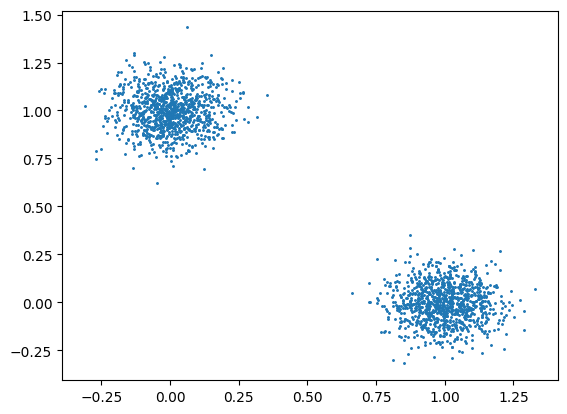

In [5]:
import matplotlib.pyplot as plt
from numpy.random import multivariate_normal as mn
import torch

data_1 = torch.tensor(mn([1, 0], [[.01, 0], [0, .01]], 1000), dtype=torch.float)
data_2 = torch.tensor(mn([0, 1], [[.01, 0], [0, .01]], 1000), dtype=torch.float)

data = torch.cat([data_1, data_2])

plt.scatter(data[:,0], data[:,1], s=1.2)
plt.show()

In [2]:
class DictionaryLearning(torch.nn.Module):

    def __init__(self, dim, n_terms):
        super(DictionaryLearning, self).__init__()
        self.dim = dim
        self.n_terms = n_terms
        self.dictionary = torch.nn.Parameter(torch.rand((n_terms, dim),
                                    dtype=torch.float,
                                    requires_grad=True
                                    ))

        print(self.dictionary)
        self.attributor = self.build_attributor()


    def build_attributor(self):
        layers = torch.nn.ModuleList()
        layers.append(torch.nn.Linear(self.dim, self.n_terms))
        layers.append(torch.nn.Softmax())
        return torch.nn.Sequential(*layers)

    def forward(self, x):
        return self.attributor(x)

    def loss(self, x, attributions):
        reconstruct = torch.matmul(attributions, self.dictionary)
        return torch.nn.MSELoss()(x, reconstruct)
    pass

Parameter containing:
tensor([[0.7702, 0.8462],
        [0.5675, 0.3512]], requires_grad=True)


/home/ec2-user/venv/lib64/python3.9/site-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


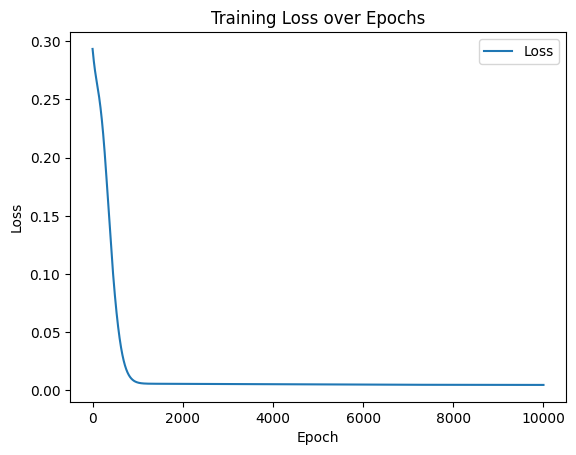

In [4]:
epochs = 10000
n_terms = 2
dim = 2

model = DictionaryLearning(dim, n_terms)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

losses = []

for e in range(epochs):
    attributions = model(data)
    loss = model.loss(data, attributions)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

plt.plot(range(1, epochs + 1), losses, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()